In [3]:
import os
import random
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd

# Directory containing .nii.gz files
directory = '/dataNAS/people/lblankem/abct_imaging_data/abct_compressed'

# Collect all .nii.gz file paths into a list
nii_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.nii.gz')]


Random .nii.gz file: /dataNAS/people/lblankem/abct_imaging_data/abct_compressed/AC423d150-AC423dc0c_1.2.840.4267.32.77369340202820561735003960660772505313_1.2.840.4267.32.88365253751021023665255254753435964082.nii.gz


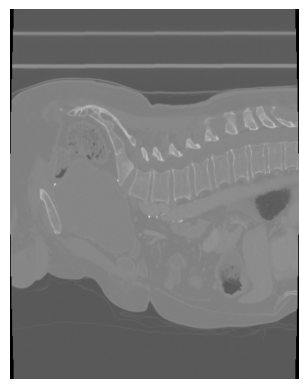

In [4]:

# Check if there are any files
if not nii_files:
    print("No .nii.gz files found in the directory.")
else:
    # Pick a random file
    random_file = random.choice(nii_files)
    print("Random .nii.gz file:", random_file)
    
    # Load the selected .nii.gz file
    img = nib.load(random_file)
    data = img.get_fdata()
    
    # Display the middle slice of the first axis
    middle_slice = data.shape[0] // 2
    plt.imshow(data[middle_slice, :, :], cmap='gray')
    # plt.title(f"Slice from {random_file}")
    plt.axis('off')
    plt.show()


In [5]:
import pandas as pd

df = pd.read_csv('/dataNAS/people/lblankem/contrastive-3d/data/phecode_labels.csv')
print(len(df))

5060


In [6]:
# path = '/dataNAS/people/lblankem/contrastive-3d/data/phecode_icd9_rolled.csv'
# path = '/dataNAS/people/lblankem/disease_classification_3d/data/disease_classification_3d_phecodes_expanded_corrected.csv'

# ICD9 and ICD10 codes mapped via PheWAS mapping to 1,692 hierarchical phecodes
path = '/dataNAS/people/lblankem/contrastive-3d/data/disease_classification_3d_phecodes_expanded_corrected.csv'

phecodes = pd.read_csv(path)
# icd9_phecodes = icd9_phecodes[['ICD9', 'PheCode', 'Phenotype']]

# icd10_phecodes = pd.read_csv('/dataNAS/people/lblankem/disease_classification_3d/data/Phecode_map_v1_2_icd10cm_beta.csv')
# icd10_phecodes = icd10_phecodes[['icd10cm', 'phecode', 'phecode_str']]

# print(icd10_phecodes.loc[icd10_phecodes['phecode'] == 8.00])
phecodes

,anon_accession,8,8.5,8.51,8.52,8.6,8.7,10,31,38,...,1011,1012,1013,1014,1015,1019,1089,1090,1100,split
0,AC421363e,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,AC421363f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,AC4213641,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,AC4213644,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
4,AC4213645,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25794,AC4245e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
25795,AC4245e7d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
25796,AC4245e80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.0
25797,AC4245e84,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.0


In [8]:
phecodes['split'].value_counts()

split
4.0    5196
0.0    5188
2.0    5162
1.0    5143
3.0    5110
Name: count, dtype: int64

In [16]:
import sys
sys.path.append('/dataNAS/people/lblankem/contrastive-3d')
from contrastive_3d.models import load_pretrained_model

model = load_pretrained_model.build_imagenet_pretrained_stage1_stage2_resnet(n_classes=1692)

/home/rholland/micromamba/envs/venv_general/lib/python3.13/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/rholland/micromamba/envs/venv_general/lib/python3.13/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/dataNAS/people/lblankem/contrastive-3d/contrastive_3d/models/inflated_convnext_pytorch/convnext.py:162: UserWarning: Overwriting convnext_tiny in registry with contrastive_3d.models.inflated_convnext_pytorch.convnext.convnext_tiny. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  @register_model
/dataNAS/people/lblankem/c

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.